In [1]:
import pandas as pd
import numpy as np
from varname import nameof
import itertools
from statistics import mean, stdev
from math import sqrt

# sklearn module
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier

# deep learning
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout
from keras import activations
from keras.callbacks import EarlyStopping, ModelCheckpoint

# visualization modules
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plotly.offline.init_notebook_mode(connected = True)

Using TensorFlow backend.


In [2]:
#Function for making confusion matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize=15)
        plt.yticks(tick_marks, target_names, fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.1 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, f'{cm[i, j]:.4f}',
                     horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black',
                    fontsize=15)
        else:
            plt.text(j, i, f'{cm[i, j]:,}',
                     horizontalalignment='center',
                     color='white' if cm[i, j] > thresh else 'black',
                    fontsize=15)


    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel(f'Predicted label\n\nAccuracy={accuracy:0.4f}; Misclass={misclass:0.4f}', fontsize=15)
    plt.show()


# Load data

In [3]:
# set display option to number of columns
pd.set_option('display.max_columns', 40)

# load data
df = pd.read_csv(r'C:\Users\user\DeepLearningProjects\League of Legends\high_diamond_ranked_10min.csv')
df

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1                  0          5           5            5                  0   
2                  0          7          11            4                  1   
3                  0          4           5            5                  1   
4                  0          6           6            6                  0   
...              ...        ...         ...          ...                ...   
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  blueHeralds  blueTowersDestroyed  blueTotalGold  \
0               0            0                    0          17210   
1               0            0                    0          14712   
2               1            0                    0          16113   
3               0            1                    0          15157   
4               0            0                    0          16400   
...           ...          ...                  ...            ...   
9874            1            0                    0          17765   
9875            1            0                    0          16238   
9876            0            0                    0          15903   
9877            1            0                    0          14459   
9878            0            0                    0          16266   

      blueAvgLevel  blueTotalExperience  blueTotalMinionsKilled  \
0              6.6                17039                     195   
1              6.6                16265                     174   
2              6.4                16221                     186   
3              7.0                17954                     201   
4              7.0                18543                     210   
...            ...                  ...                     ...   
9874           7.2                18967                     211   
9875           7.2                19255                     233   
9876           7.0                18032                     210   
9877           6.6                17229                     224   
9878           7.0                17321                     207   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
0                               36           643                  -8   
1                               43         -2908               -1173   
2                               46         -1172               -1033   
3                               55         -1321                  -7   
4                               57         -1004                 230   
...                            ...           ...                 ...   
9874                            69          2519                2469   
9875                            48

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df.describe()

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  blueHeralds  blueTowersDestroyed  \
count        9879.000000  9879.000000  9879.000000          9879.000000   
mean            0.549954     0.361980     0.187974             0.051422   
std             0.625527     0.480597     0.390712             0.244369   
min             0.000000     0.000000     0.000000             0.000000   
25%             0.000000     0.000000     0.000000             0.000000   
50%             0.000000     0.000000     0.000000             0.000000   
75%             1.000000     1.000000     0.000000             0.000000   
max             2.000000     1.000000     1.000000             4.000000   

       blueTotalGold  blueAvgLevel  blueTotalExperience  \
count    9879.000000   9879.000000          9879.000000   
mean    16503.455512      6.916004         17928.110133   
std      1535.446636      0.305146          1200.523764   
min     10730.000000      4.600000         10098.000000   
25%     15415.500000      6.800000         17168.000000   
50%     16398.000000      7.000000         17951.000000   
75%     17459.000000      7.200000         18724.000000   
max     23701.000000      8.000000         22224.000000   

       blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
count             9879.000000                   9879.000000   9879.000000   
mean               216.699565                     50.509667     14.414111   
std                 21.858437                      9.898282   2453.349179   
min                 90.000000                      0.000000 -10830.000000   
25%                202.000000                     44.000000  -1585.500000   
50%                218.000000                     50.000000     14.000000   
75%                232.000000                     56.000000   1596.000000   
max                283.000000                     92.000000  11467.000000   

       blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
count         9879.000000   9879.000000     9879.000000     9879.000000   
mean           -33.620306     21.669956     1650.345551       22.367952   
std           1920.370438      2.185844      153.544664       18.457427   
min          -9333.000000      9.000000     1073.000000        6.000000   
25%          -1290.500000     20.200000     1541.550000       14.000000   
50%            -28.000000     21.800000     1639.800000       16.000000   
75%           1212.000000     23.200000     1745.900000       20.000000   
max           8348.000000     28.300000     2370.100000      276.000000   

       redWardsDestroyed  redFirstBlood     redKills    redDeaths  \
count        9879.000000    9879.000000  9879.000000  9879.000000   
mean            2.723150       0.495192     6.137666     6.183

In [6]:
# filter for data splitting in histograms
filt = df['blueWins']==0

# histogram for values in each column
for i in range(2,df.shape[1]):
    trace = go.Histogram(x=df[filt][df.columns[i]],
                        marker_color='rgba(255,0,0,0.9)',
                        name='Game won by Red')
    trace1 = go.Histogram(x=df[~filt][df.columns[i]],
                         marker_color='rgba(0,0,255,0.9)',
                         name='Game won by Blue')
    fig = go.Figure(data=[trace, trace1], layout=go.Layout(title=go.layout.Title(text=f'{df.columns[i]}')))
    iplot(fig)

# Data preparation

In [7]:
y = df['blueWins']

# drop irrelevant/duplicate columns - if there is "blueKills" there is no need to have "redDeadths" etc
df.drop(columns=['gameId', 'redFirstBlood', 'redKills', 'redDeaths', 
                 'redGoldDiff', 'redExperienceDiff'], inplace=True)
df.head(10)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   
5         1               18                   0               0          5   
6         1               18                   3               1          7   
7         0               16                   2               0          5   
8         0               16                   3               0          7   
9         1               13                   1               1          4   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   
5           3            6                  1            1            0   
6           6            7                  1            1            0   
7          13            3                  0            0            0   
8           7            8                  0            0            0   
9           5            5                  1            1            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   
5                    0          15899           7.0                18161   
6                    0          16874           6.8                16967   
7                    0          15305           6.4                16138   
8                    0          16401           7.2                18527   
9                    0          15057           6.8                16805   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   
5                     225                            42           698   
6                     225                            53          2411   
7                     209                            48         -2615   
8                     189                            61         -1979   
9                     220                            39         -1548   

   blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
0                  -8          19.5          1721.0              15   
1               -1173          17.4          1471.2              12   
2               -1033          18.6          1611.3              15   
3                  -7          20.1          1515.7              15   
4                 230          21.0          1640.0              17   
5                 101          22.5          1589.9              36   
6                1563          22.5          1687.4              57   
7                -800          20.9          1530.5              15   
8                -771      

In [8]:
# scale data 0-1 by column

df_scaled = pd.DataFrame(preprocessing.MinMaxScaler().fit(df).transform(df), columns=df.columns)
df_scaled['blueWins'] = df_scaled['blueWins'].astype(int)
df_scaled

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0         0.093878            0.074074             1.0   
1            0         0.028571            0.037037             0.0   
2            0         0.040816            0.000000             0.0   
3            0         0.155102            0.037037             0.0   
4            0         0.285714            0.148148             0.0   
...        ...              ...                 ...             ...   
9874         1         0.048980            0.074074             1.0   
9875         1         0.200000            0.000000             0.0   
9876         0         0.073469            0.037037             0.0   
9877         0         0.036735            0.148148             1.0   
9878         1         0.053061            0.000000             1.0   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0      0.409091    0.272727     0.379310                0.0          0.0   
1      0.227273    0.227273     0.172414                0.0          0.0   
2      0.318182    0.500000     0.137931                0.5          1.0   
3      0.181818    0.227273     0.172414                0.5          0.0   
4      0.272727    0.272727     0.206897                0.0          0.0   
...         ...         ...          ...                ...          ...   
9874   0.318182    0.181818     0.172414                0.5          1.0   
9875   0.272727    0.181818     0.275862                0.5          1.0   
9876   0.272727    0.318182     0.172414                0.0          0.0   
9877   0.090909    0.136364     0.103448                0.5          1.0   
9878   0.272727    0.272727     0.172414                0.0          0.0   

      blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0             0.0                  0.0       0.499576      0.588235   
1             0.0                  0.0       0.306993      0.588235   
2             0.0                  0.0       0.415003      0.529412   
3             1.0                  0.0       0.341300      0.705882   
4             0.0                  0.0       0.437129      0.705882   
...           ...                  ...            ...           ...   
9874          0.0                  0.0       0.542364      0.764706   
9875          0.0                  0.0       0.424640      0.764706   
9876          0.0                  0.0       0.398813      0.705882   
9877          0.0                  0.0       0.287487      0.588235   
9878          0.0                  0.0       0.426798      0.705882   

      blueTotalExperience  blueTotalMinionsKilled  \
0                0.572406                0.544041   
1                0.508577                0.435233   
2                0.504948                0.497409   
3                0.647864                0.575130   
4                0.696437                0.621762   
...                   ...                     ...   
9874             0.731404                0.626943   
9875             0.755154                0.740933   
9876             0.654297                0.621762   
9877             0.588075                0.694301   
9878             0.595662                0.606218   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
0                         0.391304      0.514554            0.527402   
1                         0.467391      0.355294            0.461512   
2                         0.500000      0.433152            0.469430   
3                         0.597826      0.426470            0.527459   
4                         0.619565      0.440687            0.540863   
...                            ...           ...                 ...   
9874                      0.750000      0.598690            0.667496   
9875                      0.521739      0.520788            0.578078   
9876                      0.489130      0.377360            0.421696   
9877                      0.52

## d Cohens effect size

In [9]:
# calculate d Cohens effect size to see the differences between two groups in each column

effects=[]
for column in range(1, df.shape[1]):
    c0 = df.iloc[:,column][filt].tolist()
    c1 = df.iloc[:,column][~filt].tolist()
    mianownik = (sqrt(((len(c0)-1)*stdev(c0) ** 2 + (len(c1)-1)*stdev(c1) ** 2) / len(c0)+len(c1)-2))
    cohens_d = abs((mean(c0) - mean(c1)) / mianownik)
    effects.append([round(cohens_d,3),df.columns[column]])

effects.sort(reverse=True)

print(effects)

[[0.842, 'blueGoldDiff'], [0.794, 'blueExperienceDiff'], [0.649, 'blueTotalGold'], [0.639, 'redTotalGold'], [0.612, 'blueGoldPerMin'], [0.61, 'blueTotalExperience'], [0.6, 'redGoldPerMin'], [0.595, 'redTotalExperience'], [0.129, 'blueTotalMinionsKilled'], [0.122, 'redTotalMinionsKilled'], [0.036, 'blueTotalJungleMinionsKilled'], [0.032, 'blueAssists'], [0.031, 'redTotalJungleMinionsKilled'], [0.031, 'redAssists'], [0.029, 'blueKills'], [0.028, 'blueDeaths'], [0.014, 'blueCSPerMin'], [0.013, 'redCSPerMin'], [0.012, 'redWardsPlaced'], [0.004, 'redEliteMonsters'], [0.004, 'blueEliteMonsters'], [0.003, 'redWardsDestroyed'], [0.003, 'redDragons'], [0.003, 'redAvgLevel'], [0.003, 'blueWardsDestroyed'], [0.003, 'blueFirstBlood'], [0.003, 'blueDragons'], [0.003, 'blueAvgLevel'], [0.001, 'redTowersDestroyed'], [0.001, 'redHeralds'], [0.001, 'blueTowersDestroyed'], [0.001, 'blueHeralds'], [0.0, 'blueWardsPlaced']]


In [10]:
# select features with effect size >0.5

df_scaled_cohen = df_scaled[['blueGoldDiff', 'blueExperienceDiff', 'blueTotalGold', 'redTotalGold', 
                             'blueGoldPerMin', 'blueTotalExperience', 'redGoldPerMin', 'redTotalExperience']]
df_scaled_cohen

blueGoldDiff  blueExperienceDiff  blueTotalGold  redTotalGold  \
0         0.514554            0.527402       0.499576      0.464844   
1         0.355294            0.461512       0.306993      0.556250   
2         0.433152            0.469430       0.415003      0.527170   
3         0.426470            0.527459       0.341300      0.457118   
4         0.440687            0.540863       0.437129      0.537500   
...            ...                 ...            ...           ...   
9874      0.598690            0.667496       0.542364      0.350174   
9875      0.520788            0.578078       0.424640      0.368403   
9876      0.377360            0.421696       0.398813      0.616927   
9877      0.448087            0.466489       0.287487      0.354688   
9878      0.527291            0.524574       0.426798      0.358247   

      blueGoldPerMin  blueTotalExperience  redGoldPerMin  redTotalExperience  
0           0.499576             0.572406       0.464844            0.557608  
1           0.306993             0.508577       0.556250            0.590732  
2           0.415003             0.504948       0.527170            0.575144  
3           0.341300             0.647864       0.457118            0.635039  
4           0.437129             0.696437       0.537500            0.664859  
...              ...                  ...            ...                 ...  
9874        0.542364             0.731404       0.350174            0.511098  
9875        0.424640             0.755154       0.368403            0.669434  
9876        0.398813             0.654297       0.616927            0.800068  
9877        0.287487             0.588075       0.354688            0.664944  
9878        0.426798             0.595662       0.358247            0.585734  

[9879 rows x 8 columns]

## Correlation matrix

In [11]:
# calculate correlation matrix of features
corr_matrix = df_scaled.corr()

# plot correlation matrix 
trace = go.Heatmap(z=corr_matrix,
                  x=df_scaled.columns,
                  y=df_scaled.columns)

layout = go.Layout(title=go.layout.Title(text='Correlation heatmap', x=0.50, font_size=25),
                   margin=go.layout.Margin(l=0, r=0, t=40, b=10))

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [12]:
# see with features have biggest/smallest correlation value 
corr_matrix['blueWins'][(corr_matrix['blueWins']<(-0.4))|(corr_matrix['blueWins']>(0.4))]

blueWins              1.000000
blueTotalGold         0.417213
blueGoldDiff          0.511119
blueExperienceDiff    0.489558
blueGoldPerMin        0.417213
redTotalGold         -0.411396
redGoldPerMin        -0.411396
Name: blueWins, dtype: float64

In [13]:
# select features that are correlated with "blueWins" the most
df_scaled_corr = df_scaled[['blueTotalGold','blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin', 
                            'redTotalGold', 'redGoldPerMin']]
df_scaled_corr

blueTotalGold  blueGoldDiff  blueExperienceDiff  blueGoldPerMin  \
0          0.499576      0.514554            0.527402        0.499576   
1          0.306993      0.355294            0.461512        0.306993   
2          0.415003      0.433152            0.469430        0.415003   
3          0.341300      0.426470            0.527459        0.341300   
4          0.437129      0.440687            0.540863        0.437129   
...             ...           ...                 ...             ...   
9874       0.542364      0.598690            0.667496        0.542364   
9875       0.424640      0.520788            0.578078        0.424640   
9876       0.398813      0.377360            0.421696        0.398813   
9877       0.287487      0.448087            0.466489        0.287487   
9878       0.426798      0.527291            0.524574        0.426798   

      redTotalGold  redGoldPerMin  
0         0.464844       0.464844  
1         0.556250       0.556250  
2         0.527170       0.527170  
3         0.457118       0.457118  
4         0.537500       0.537500  
...            ...            ...  
9874      0.350174       0.350174  
9875      0.368403       0.368403  
9876      0.616927       0.616927  
9877      0.354688       0.354688  
9878      0.358247       0.358247  

[9879 rows x 6 columns]

## K best and chisquare

In [14]:
# separate columns with data and label
X = df_scaled.drop(['blueWins'],axis=1)
y = df_scaled['blueWins']

# leverage SelectKBest class to extract the top 9 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
df_scores = pd.DataFrame({'Score':fit.scores_, 
                               'Feature':X.columns})

# display the 5 best features 
print(df_scores.nlargest(5,'Score'))

         Score            Feature
7   288.025837        blueDragons
23  254.514302         redDragons
2   199.157410     blueFirstBlood
6   173.097707  blueEliteMonsters
22  166.014728   redEliteMonsters


In [15]:
# select the 5 best features based on K-best algorithm
df_scaled_kbest = df_scaled[['blueDragons', 'redDragons', 'blueFirstBlood', 'blueEliteMonsters', 'redEliteMonsters']]
df_scaled_kbest

blueDragons  redDragons  blueFirstBlood  blueEliteMonsters  \
0             0.0         0.0             1.0                0.0   
1             0.0         1.0             0.0                0.0   
2             1.0         0.0             0.0                0.5   
3             0.0         0.0             0.0                0.5   
4             0.0         1.0             0.0                0.0   
...           ...         ...             ...                ...   
9874          1.0         0.0             1.0                0.5   
9875          1.0         0.0             0.0                0.5   
9876          0.0         1.0             0.0                0.0   
9877          1.0         0.0             1.0                0.5   
9878          0.0         1.0             1.0                0.0   

      redEliteMonsters  
0                  0.0  
1                  1.0  
2                  0.0  
3                  0.0  
4                  0.5  
...                ...  
9874               0.0  
9875               0.0  
9876               0.5  
9877               0.0  
9878               0.5  

[9879 rows x 5 columns]

# Classification

In [16]:
df_scaled.drop(columns=['blueWins'], inplace=True)
datasets = [df_scaled, df_scaled_cohen, df_scaled_corr, df_scaled_kbest]
df_scaled

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0            0.093878            0.074074             1.0   0.409091   
1            0.028571            0.037037             0.0   0.227273   
2            0.040816            0.000000             0.0   0.318182   
3            0.155102            0.037037             0.0   0.181818   
4            0.285714            0.148148             0.0   0.272727   
...               ...                 ...             ...        ...   
9874         0.048980            0.074074             1.0   0.318182   
9875         0.200000            0.000000             0.0   0.272727   
9876         0.073469            0.037037             0.0   0.272727   
9877         0.036735            0.148148             1.0   0.090909   
9878         0.053061            0.000000             1.0   0.272727   

      blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0       0.272727     0.379310                0.0          0.0          0.0   
1       0.227273     0.172414                0.0          0.0          0.0   
2       0.500000     0.137931                0.5          1.0          0.0   
3       0.227273     0.172414                0.5          0.0          1.0   
4       0.272727     0.206897                0.0          0.0          0.0   
...          ...          ...                ...          ...          ...   
9874    0.181818     0.172414                0.5          1.0          0.0   
9875    0.181818     0.275862                0.5          1.0          0.0   
9876    0.318182     0.172414                0.0          0.0          0.0   
9877    0.136364     0.103448                0.5          1.0          0.0   
9878    0.272727     0.172414                0.0          0.0          0.0   

      blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                     0.0       0.499576      0.588235             0.572406   
1                     0.0       0.306993      0.588235             0.508577   
2                     0.0       0.415003      0.529412             0.504948   
3                     0.0       0.341300      0.705882             0.647864   
4                     0.0       0.437129      0.705882             0.696437   
...                   ...            ...           ...                  ...   
9874                  0.0       0.542364      0.764706             0.731404   
9875                  0.0       0.424640      0.764706             0.755154   
9876                  0.0       0.398813      0.705882             0.654297   
9877                  0.0       0.287487      0.588235             0.588075   
9878                  0.0       0.426798      0.705882             0.595662   

      blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                   0.544041                      0.391304      0.514554   
1                   0.435233                      0.467391      0.355294   
2                   0.497409                      0.500000      0.433152   
3                   0.575130                      0.597826      0.426470   
4                   0.621762                      0.619565      0.440687   
...                      ...                           ...           ...   
9874                0.626943                      0.750000      0.598690   
9875                0.740933                      0.521739      0.520788   
9876                0.621762                      0.489130      0.377360   
9877                0.694301                      0.521739      0.448087   
9878                0.606218                      0.478261      0.527291   

      blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
0               0.527402      0.544041        0.499576        0.033333   
1               0.461512      0.435233        0.306993        0.022222   
2               0.469430      0.497409        0.415003        0.033333   
3               0.527459      0.575130        

In [17]:
scores_overall = [] # store all scores in one variable

In [18]:
def run_model(model, list_of_datasets, y, model_name):
    scores_model = []
    for X in range(len(list_of_datasets)):  
        scores = cross_val_score(model, list_of_datasets[X], y, cv=5)
        scores_model.append(round(scores.mean(),3))
        print(f'{model_name} for {X+1}. dataset Accuracy:{scores.mean():.3f}(+/-{scores.std() * 2:.3f}).')

        X_train, X_test, y_train, y_test = train_test_split(list_of_datasets[X], y, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        labels = ['Red Win', 'Blue Win']
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=None, normalize=True)

    scores_overall.append(scores_model)
    

### Decision Tree Classifier

Decision Tree Classifier for 1. dataset Accuracy:0.637(+/-0.021).


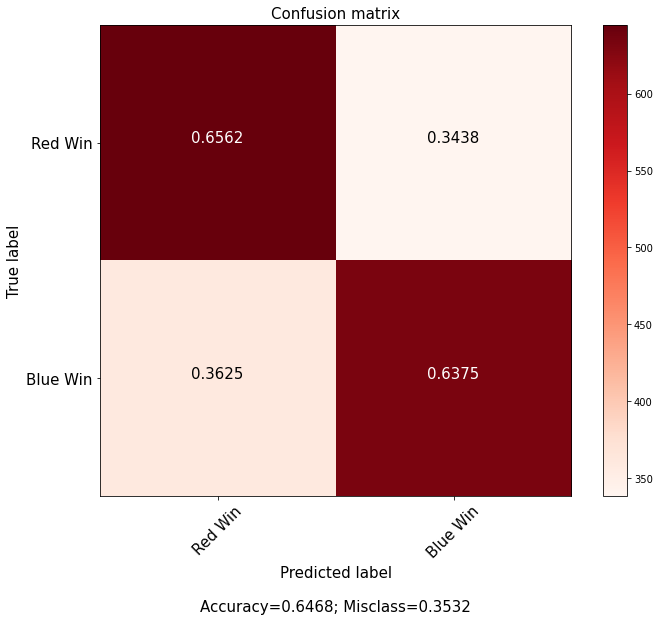

Decision Tree Classifier for 2. dataset Accuracy:0.638(+/-0.014).


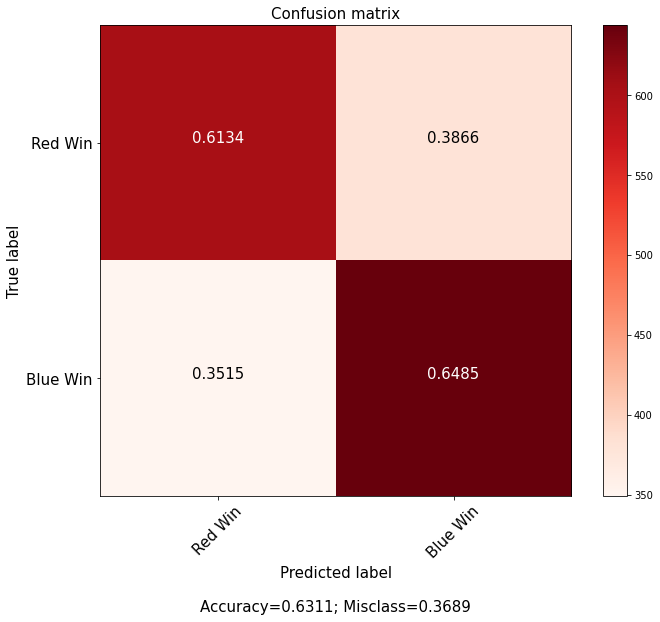

Decision Tree Classifier for 3. dataset Accuracy:0.637(+/-0.018).


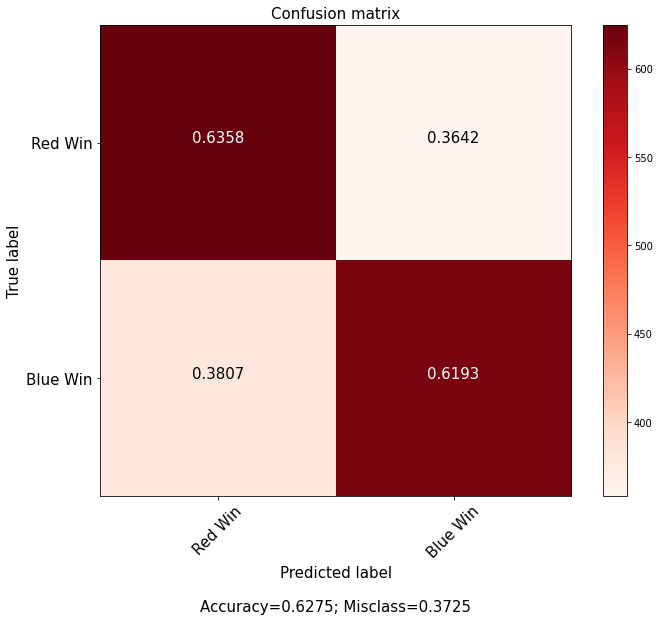

Decision Tree Classifier for 4. dataset Accuracy:0.628(+/-0.010).


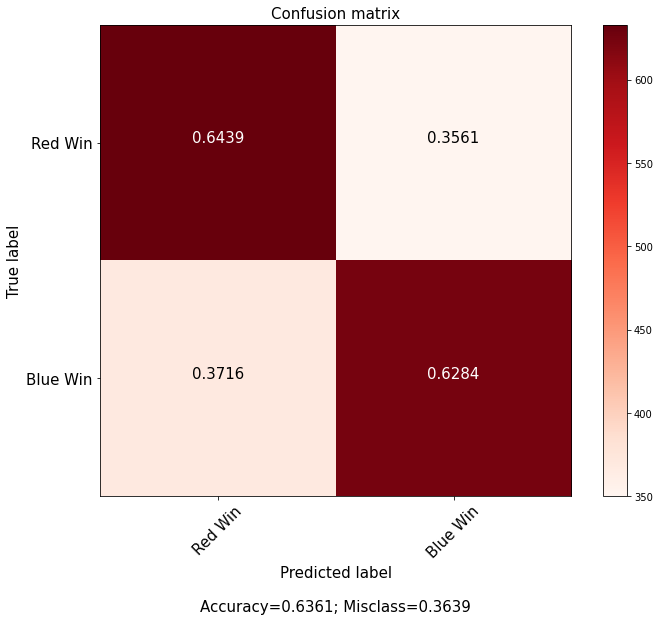

In [19]:
model = tree.DecisionTreeClassifier(criterion='entropy')
run_model(model, datasets, y, 'Decision Tree Classifier')

### Random Forest Classifier

Random Forest Classifier for 1. dataset Accuracy:0.695(+/-0.024).


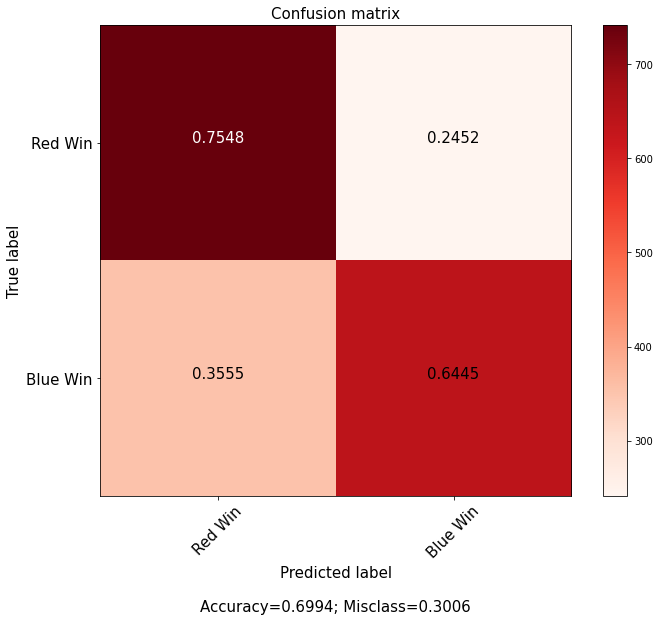

Random Forest Classifier for 2. dataset Accuracy:0.697(+/-0.019).


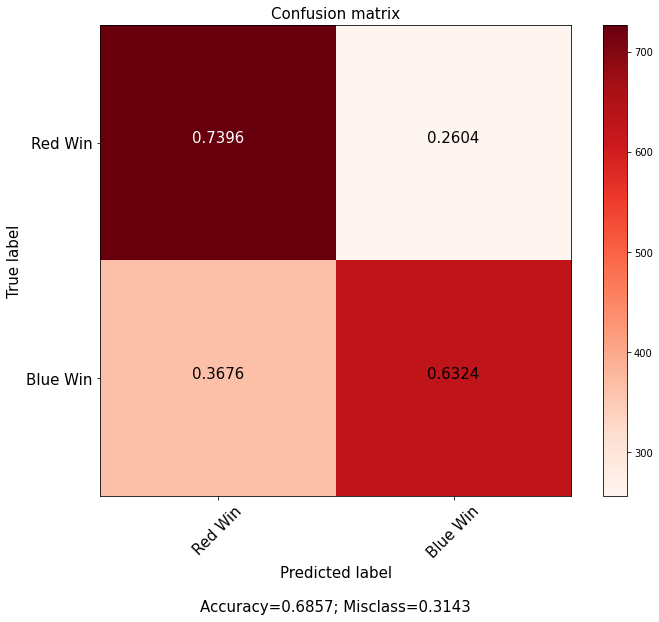

Random Forest Classifier for 3. dataset Accuracy:0.684(+/-0.025).


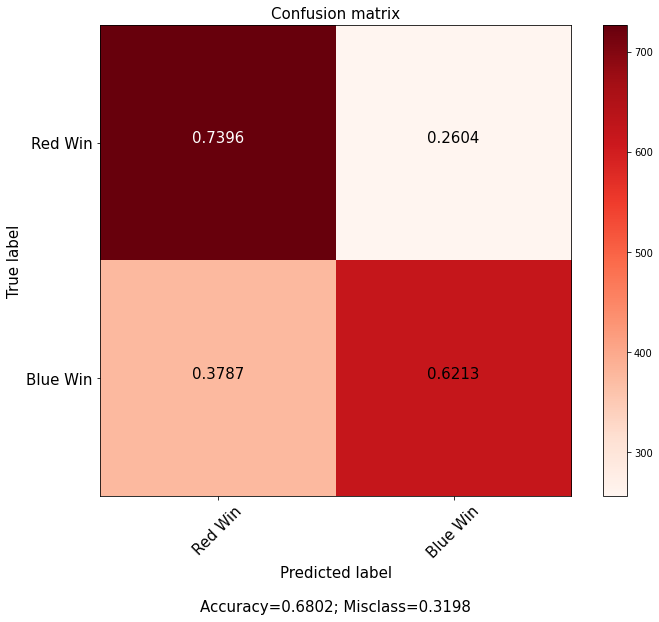

Random Forest Classifier for 4. dataset Accuracy:0.628(+/-0.010).


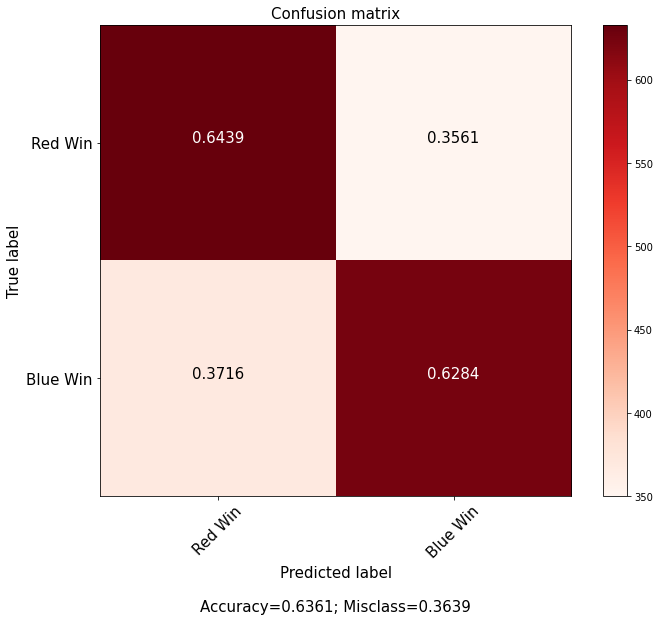

In [20]:
model = RandomForestClassifier(n_estimators=10)
run_model(model, datasets, y, 'Random Forest Classifier')

### Gaussian Naive Bayes

Gaussian Naive Bayes for 1. dataset Accuracy:0.726(+/-0.013).


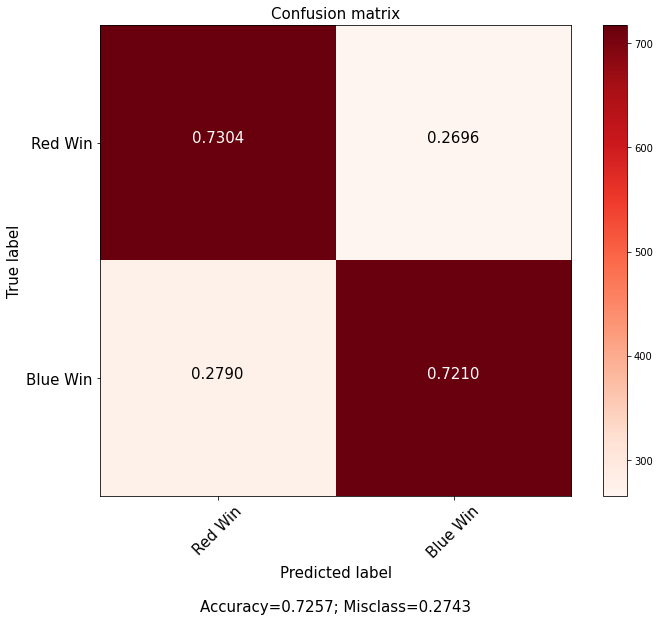

Gaussian Naive Bayes for 2. dataset Accuracy:0.728(+/-0.016).


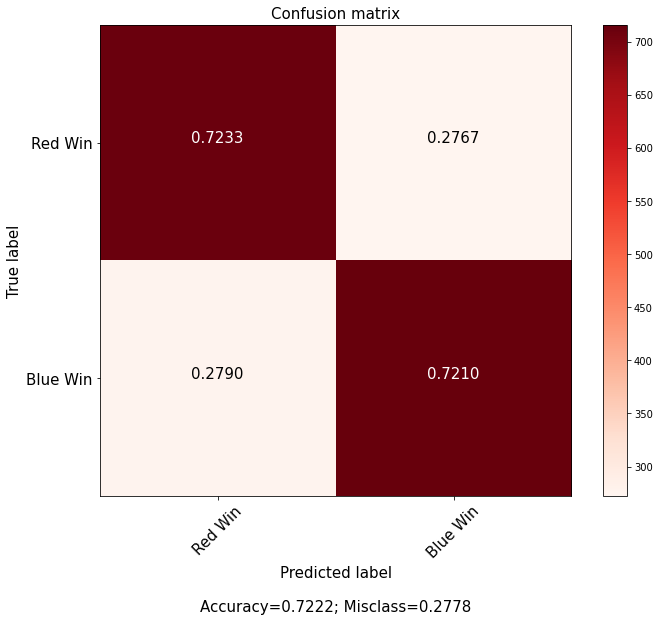

Gaussian Naive Bayes for 3. dataset Accuracy:0.727(+/-0.014).


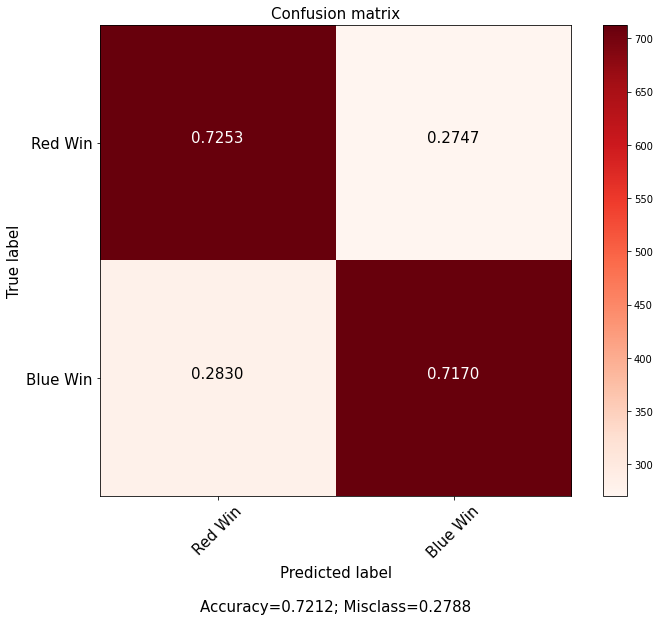

Gaussian Naive Bayes for 4. dataset Accuracy:0.623(+/-0.013).


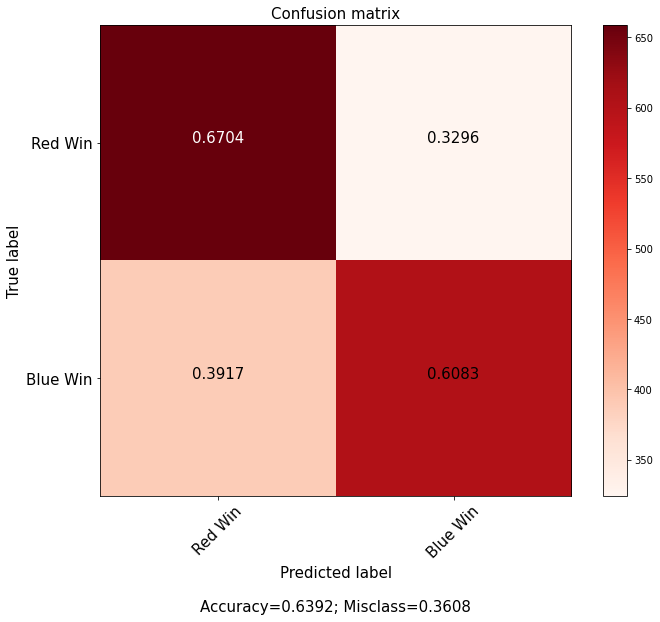

In [21]:
model = GaussianNB()
run_model(model, datasets, y, 'Gaussian Naive Bayes')

### C-Support Vector Classification

C-Support Vector Classification for 1. dataset Accuracy:0.725(+/-0.014).


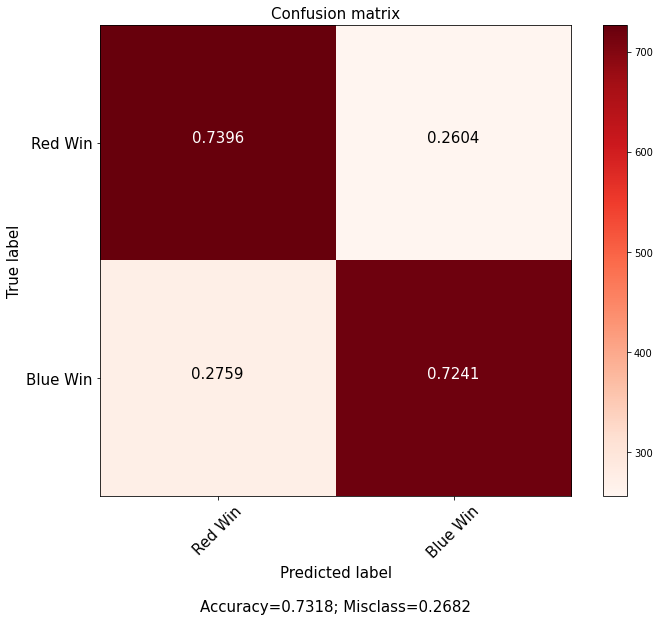

C-Support Vector Classification for 2. dataset Accuracy:0.726(+/-0.011).


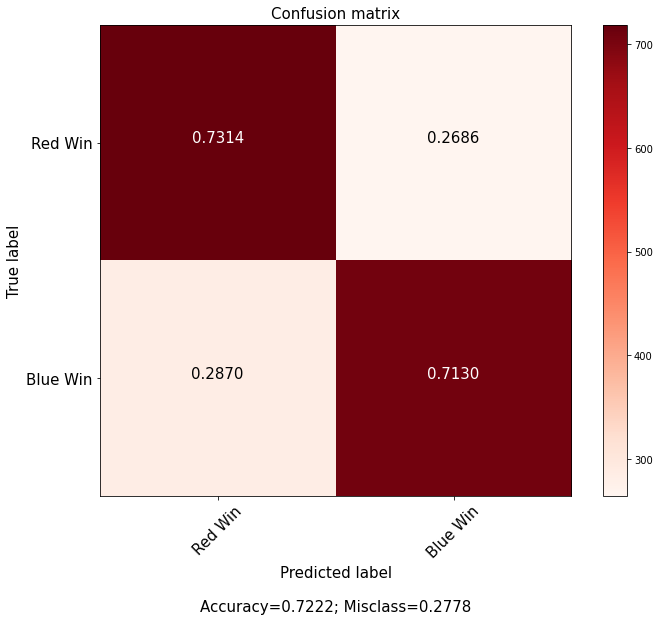

C-Support Vector Classification for 3. dataset Accuracy:0.727(+/-0.011).


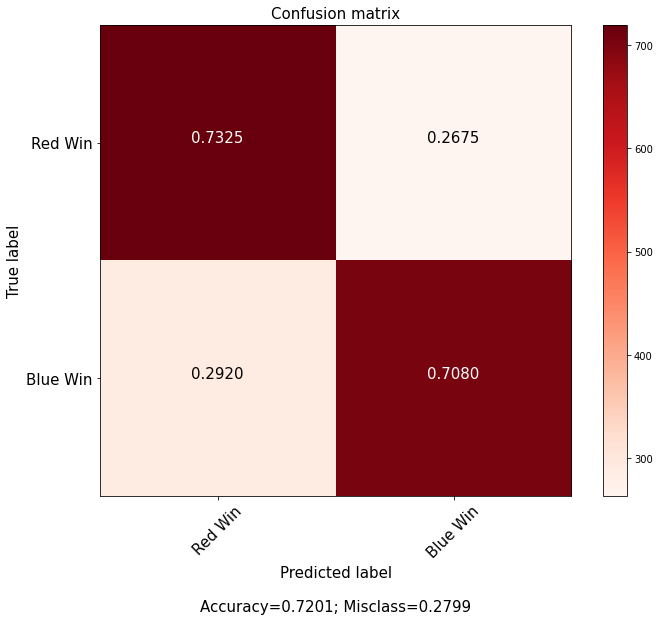

C-Support Vector Classification for 4. dataset Accuracy:0.628(+/-0.010).


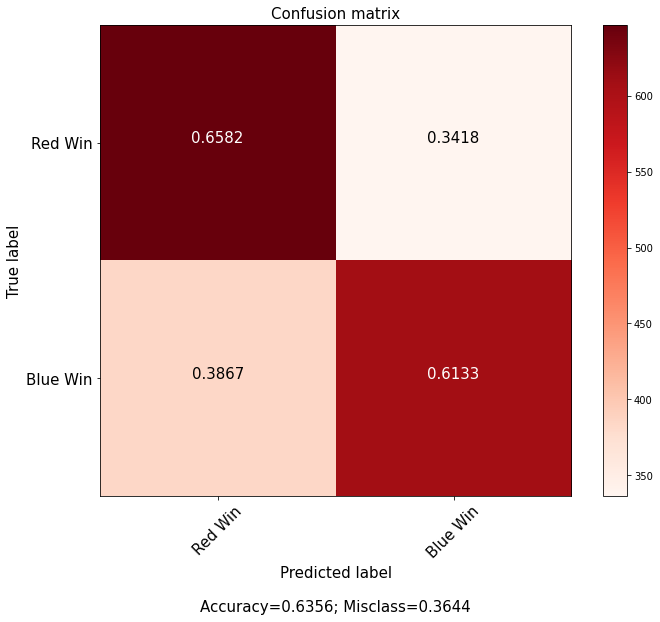

In [22]:
model = SVC(probability=True)
run_model(model, datasets, y, 'C-Support Vector Classification')

### K-Neighbors Classifier

K-Neighbors Classifier for 1. dataset Accuracy:0.684(+/-0.022).


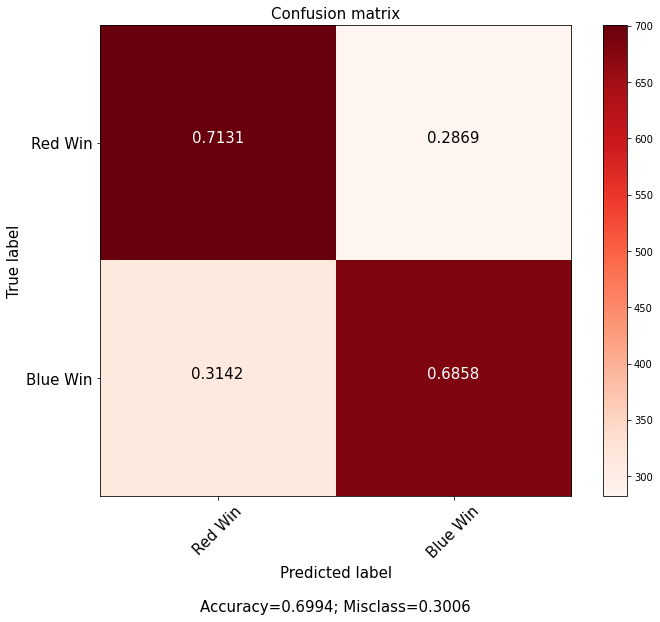

K-Neighbors Classifier for 2. dataset Accuracy:0.689(+/-0.018).


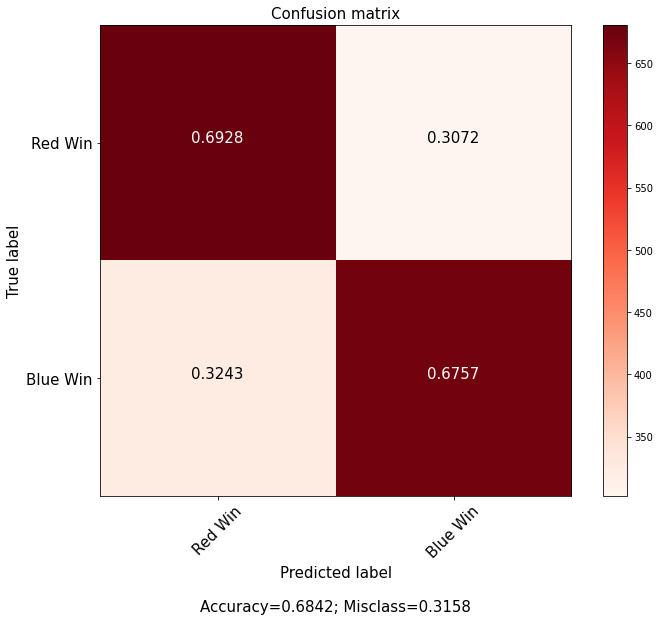

K-Neighbors Classifier for 3. dataset Accuracy:0.684(+/-0.009).


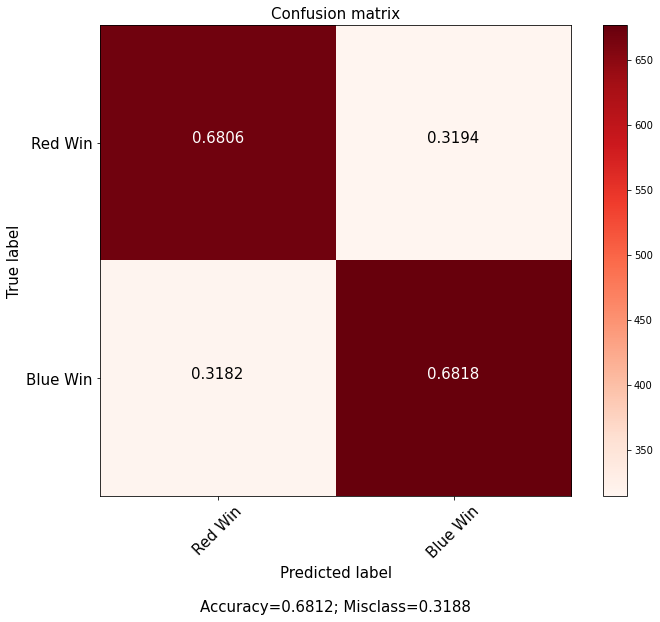

K-Neighbors Classifier for 4. dataset Accuracy:0.565(+/-0.125).


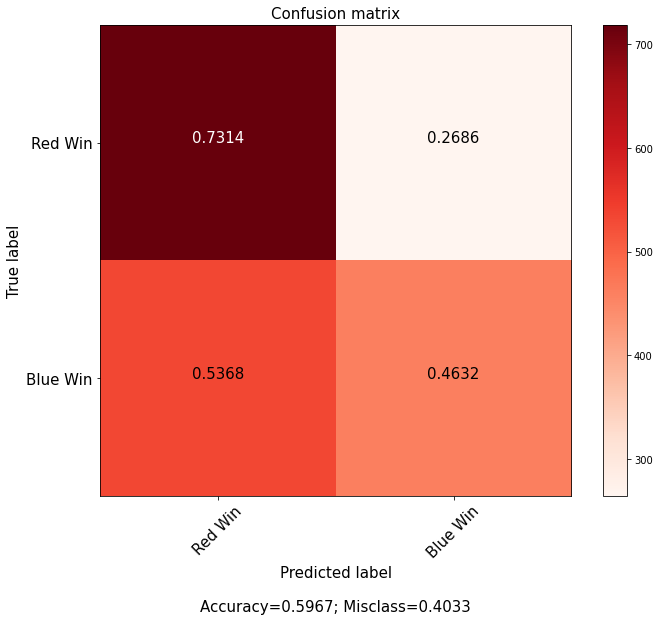

In [23]:
model = neighbors.KNeighborsClassifier()
run_model(model, datasets, y, 'K-Neighbors Classifier')

### Multi-layer Perceptron Classifier

C:\Users\user\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\user\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Multi-layer Perceptron Classifier for 1. dataset Accuracy:0.723(+/-0.017).


C:\Users\user\.conda\envs\tensorflowgpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



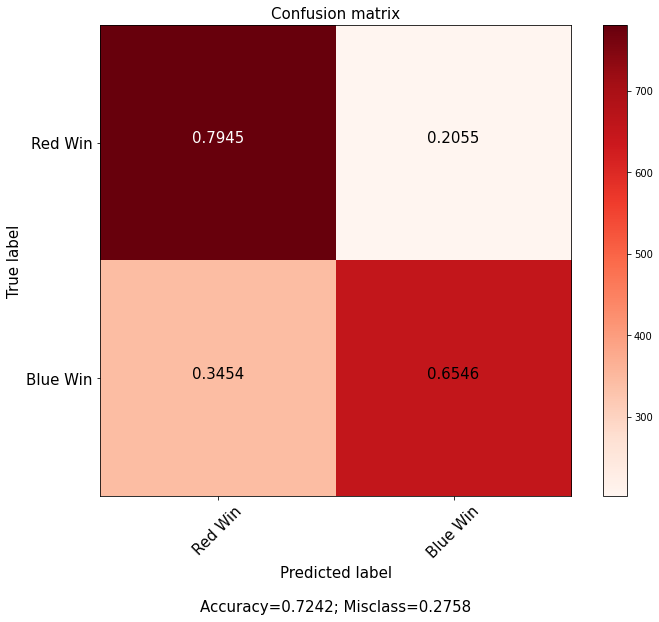

Multi-layer Perceptron Classifier for 2. dataset Accuracy:0.727(+/-0.014).


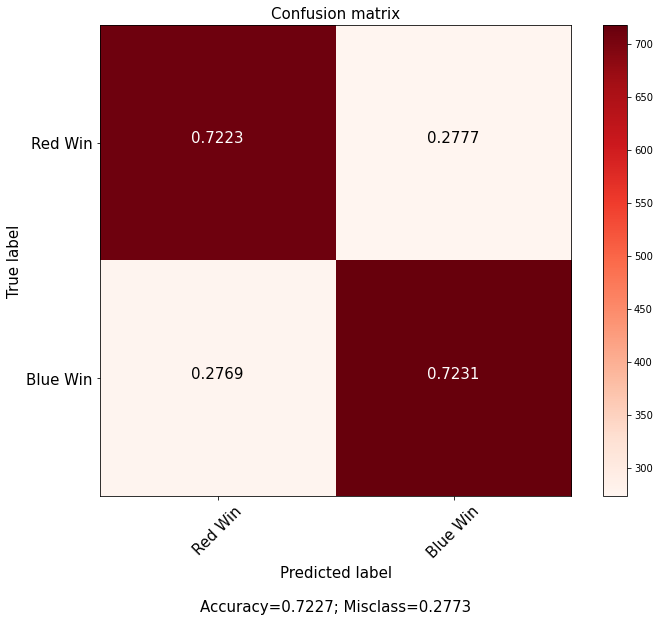

Multi-layer Perceptron Classifier for 3. dataset Accuracy:0.726(+/-0.013).


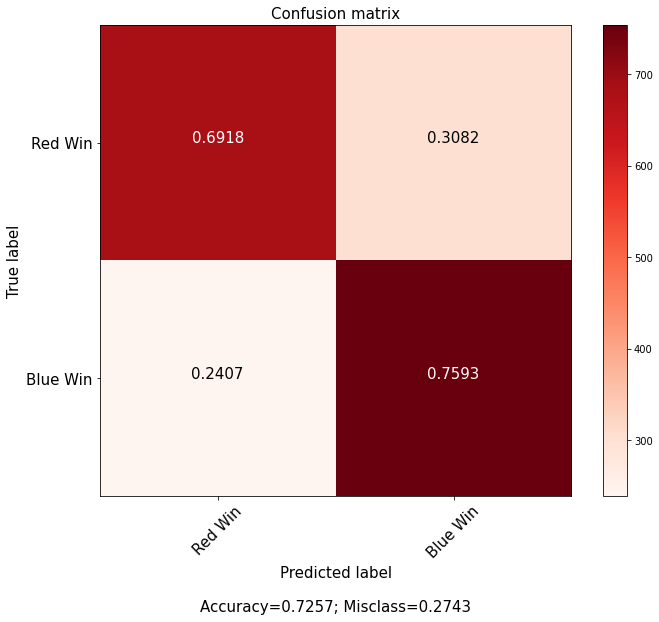

Multi-layer Perceptron Classifier for 4. dataset Accuracy:0.629(+/-0.010).


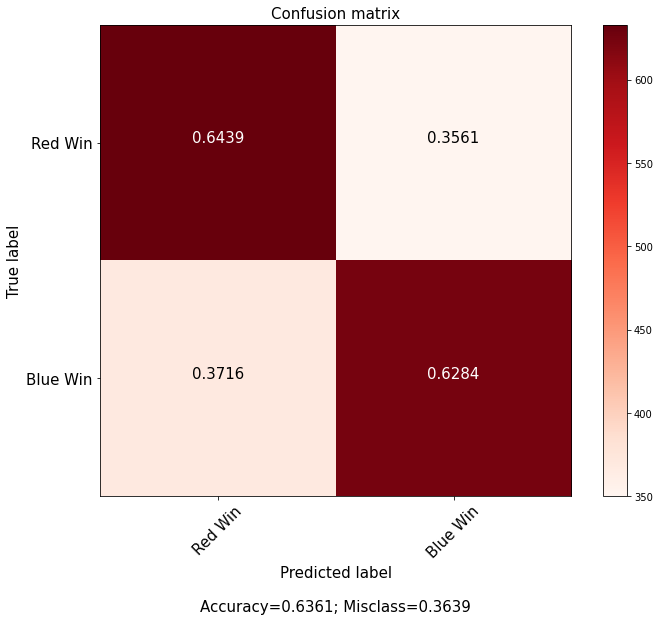

In [24]:
model = MLPClassifier()
run_model(model, datasets, y, 'Multi-layer Perceptron Classifier')

In [25]:
# visualize all scores on one plot
traces = []
colors = ['rgb(255,0,0)', 'rgb(0,255,0)', 'rgb(0,0,255)', 'rgb(255,0,255)', 
          'rgb(200,200,0)', 'rgb(160,160,255)']
datasets_names = ['All features', 'd Cohen data', 'Correlation data', 'K-best and chi2']
model_names = ['Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 
              'C-Support Vector Classification', 'K-Neighbors Classifier', 'Multi-layer Perceptron Classifier']

for idx in range(len(scores_overall)):
    trace = go.Bar(x=datasets_names,
                   y=scores_overall[idx],
                   marker_color=colors[idx],
                   name=model_names[idx])
    traces.append(trace)
    
layout = go.Layout(title='Comparison the accuracy results',
                  legend=go.layout.Legend(y=0))
fig = go.Figure(data=traces, layout=layout)

iplot(fig)

### Deep neural network

In [26]:
# split dataset to train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'There are {len(X_train)} game data in training data')
print(f'There are {len(X_val)} game data in validation data')
print(f'There are {len(X_test)} game data in testing data')

There are 6322 game data in training data
There are 1581 game data in validation data
There are 1976 game data in testing data


In [27]:
# create deep neural model
model = Sequential()

model.add(Dense(32, input_shape = (33,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer = 'adam'
loss_function = 'sparse_categorical_crossentropy'

model.compile(loss=loss_function, optimizer=optimizer,  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [28]:
# model training
epochs = 100
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = epochs)

Train on 6322 samples, validate on 1581 samples
Epoch 1/100
6322/6322 [==============================] - 2s 358us/step - loss: 0.6246 - accuracy: 0.6465 - val_loss: 0.5674 - val_accuracy: 0.6989
Epoch 2/100
6322/6322 [==============================] - 1s 176us/step - loss: 0.5792 - accuracy: 0.6999 - val_loss: 0.5407 - val_accuracy: 0.7318
Epoch 3/100
6322/6322 [==============================] - 1s 177us/step - loss: 0.5687 - accuracy: 0.7113 - val_loss: 0.5396 - val_accuracy: 0.7337
Epoch 4/100
6322/6322 [==============================] - 1s 177us/step - loss: 0.5654 - accuracy: 0.7071 - val_loss: 0.5371 - val_accuracy: 0.7255
Epoch 5/100
6322/6322 [==============================] - 1s 178us/step - loss: 0.5624 - accuracy: 0.7112 - val_loss: 0.5316 - val_accuracy: 0.7306
Epoch 6/100
6322/6322 [==============================] - 1s 191us/step - loss: 0.5584 - accuracy: 0.7164 - val_loss: 0.5325 - val_accuracy: 0.7268
Epoch 7/100
6322/6322 [==============================] - 1s 182us/step

Epoch 56/100
6322/6322 [==============================] - 1s 181us/step - loss: 0.5337 - accuracy: 0.7270 - val_loss: 0.5328 - val_accuracy: 0.7306
Epoch 57/100
6322/6322 [==============================] - 1s 166us/step - loss: 0.5338 - accuracy: 0.7303 - val_loss: 0.5318 - val_accuracy: 0.7306
Epoch 58/100
6322/6322 [==============================] - 1s 168us/step - loss: 0.5366 - accuracy: 0.7230 - val_loss: 0.5325 - val_accuracy: 0.7299
Epoch 59/100
6322/6322 [==============================] - 1s 168us/step - loss: 0.5336 - accuracy: 0.7262 - val_loss: 0.5295 - val_accuracy: 0.7287
Epoch 60/100
6322/6322 [==============================] - 1s 170us/step - loss: 0.5302 - accuracy: 0.7327 - val_loss: 0.5266 - val_accuracy: 0.7331
Epoch 61/100
6322/6322 [==============================] - 1s 170us/step - loss: 0.5329 - accuracy: 0.7265 - val_loss: 0.5305 - val_accuracy: 0.7268
Epoch 62/100
6322/6322 [==============================] - 1s 167us/step - loss: 0.5317 - accuracy: 0.7322 - val_

In [30]:
# accuracy and loss plot based on training history

index = [i for i in range(epochs)]

loss_val = go.Scatter(x = index,
                      y = history.history['val_loss'],
                      marker_color='red',
                      name = 'Validation Loss') 
loss = go.Scatter(x = index,
                  y = history.history['loss'],
                  marker_color='blue',
                  name = 'Loss')
layout_loss = go.Layout(title = go.layout.Title(text = 'Loss vs Validation Loss', x=0.45, font = go.layout.title.Font(size=25, color='black', family='Droid Serif”')),
                  plot_bgcolor='rgb(230,230,255)',
                  legend=go.layout.Legend(bordercolor='rgb(0,0,0)', bgcolor='rgb(256,200,256)', borderwidth=2),
                  xaxis = go.layout.XAxis(title_text='Epochs', titlefont_size=15),
                  yaxis = go.layout.YAxis(title_text='Loss [%]', titlefont_size=15, range=(0,0.65)),
                  margin=go.layout.Margin(l=0, r=0, t=50, b=50))

fig_loss = go.Figure(data=[loss, loss_val], layout = layout_loss)


acc = go.Scatter(x=index,
                y=history.history['accuracy'],
                marker=dict(color='blue'),
                name='Accuracy')
acc_val = go.Scatter(x=index,
                    y=history.history['val_accuracy'],
                    marker=dict(color='red'),
                    name='Validation Accuracy')
layout_acc = go.Layout(title=dict(text='Accuracy vs Validation Accuracy',x=0.45, font=dict(size=25, color='black', family='Droid Serif')),
                      plot_bgcolor='rgba(230,230,255,0.5)',
                       legend=dict(bordercolor='rgb(0,0,0)', bgcolor='rgb(256,200,256)', borderwidth=2),
                  xaxis = dict(title=dict(text='Epochs'), titlefont=dict(size=15)),
                  yaxis = dict(title=dict(text='Loss [%]'), titlefont=dict(size=15), range=(0.65,1)))

fig_acc = go.Figure(data=[acc, acc_val], layout = layout_acc)

iplot(fig_loss)
iplot(fig_acc)